## Project intro: Analysis of US Tax Revenue

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%config InlineBackend.figure_format = 'retina'
#plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('STC_2015_00A2.csv')
tax2015 = df[['Geographic area name', 'Year', 
             'Meaning of Tax Type', 'Amount ($1,000)']]
tax2015.columns = [['area', 'year', 'type', 'amount_B']]
tax2015 = tax2015.dropna()

In [4]:
tax2015.amount_B = tax2015.amount_B.replace('X','0')

In [31]:
tax2015.head(10)

,area,year,type,amount_B
1,United States,2015.0,Total Taxes,916.488050
2,United States,2015.0,Property Taxes,17.555153
3,United States,2015.0,Sales and Gross Receipts Taxes,431.255544
4,United States,2015.0,License Taxes,52.199149
5,United States,2015.0,Income Taxes,387.206745
6,United States,2015.0,Other Taxes,28.271459
7,Alabama,2015.0,Total Taxes,9.755439
8,Alabama,2015.0,Property Taxes,0.336825
9,Alabama,2015.0,Sales and Gross Receipts Taxes,4.936049
10,Alabama,2015.0,License Taxes,0.493883


In [5]:
def str2float(str_a):
    return float(str_a.replace(',',''))/10**6      

In [6]:
tax2015.amount_B = tax2015.amount_B.apply(str2float)

In [7]:
totax = tax2015[tax2015.type=='Total Taxes'].sort_values('amount_B', ascending=False)

In [8]:
totax.head()

,area,year,type,amount_B
1,United States,2015.0,Total Taxes,916.488050
31,California,2015.0,Total Taxes,151.172643
199,New York,2015.0,Total Taxes,78.242729
265,Texas,2015.0,Total Taxes,55.086438
85,Illinois,2015.0,Total Taxes,39.283051


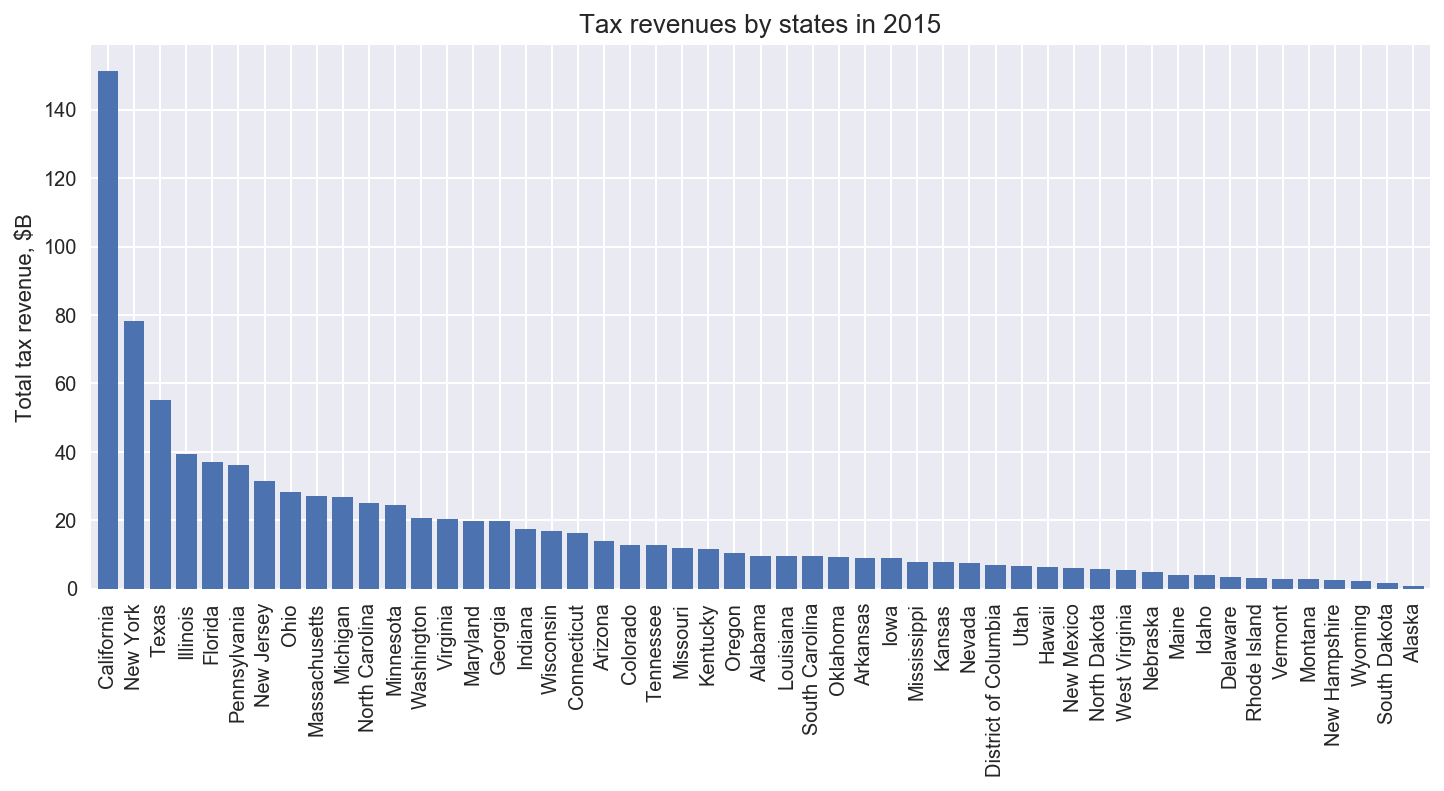

In [11]:
plt.figure(figsize=[12,5])
ax = totax[1:]['amount_B'].plot(kind = 'bar', width=0.8)
ax.set_xticklabels( totax['area'][1:], fontsize = 10)
ax.set_ylabel('Total tax revenue, $B')
plt.title('Tax revenues by states in 2015', fontsize=13)
plt.show()

CA is the highest, followed by NY and TX

In [17]:
ustax

,area,year,type,amount_B
2,United States,2015.0,Property Taxes,17.555153
3,United States,2015.0,Sales and Gross Receipts Taxes,431.255544
4,United States,2015.0,License Taxes,52.199149
5,United States,2015.0,Income Taxes,387.206745
6,United States,2015.0,Other Taxes,28.271459


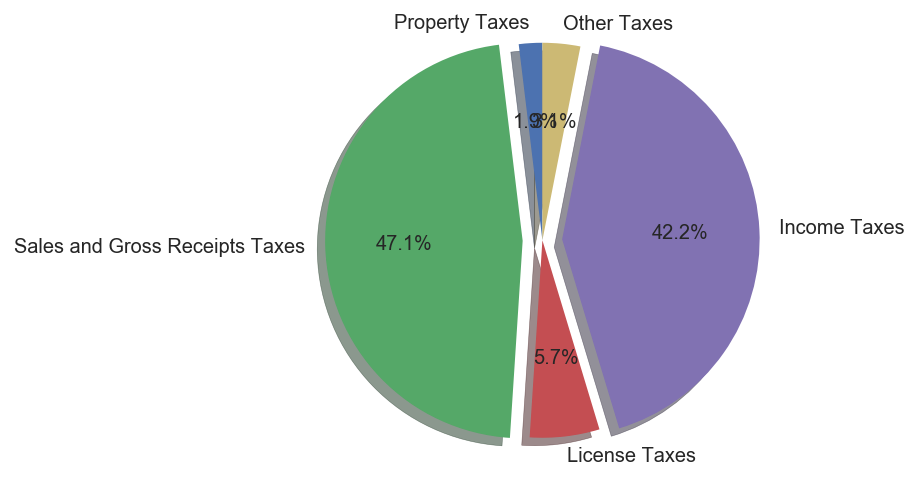

In [28]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
ustax = tax2015[1:6]
explode = (0, 0.1, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(ustax.amount_B,  explode=explode, labels=ustax.type, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

##### States with no income taxes:

In [56]:
no_income_tax = tax2015[tax2015.type=='Income Taxes'][tax2015.amount_B==0]
for st in list(no_income_tax.area):
    print st,

Nevada Texas Washington Wyoming


/Users/hhpham1/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


#### States with no property taxes:

In [58]:
no_property_tax = tax2015[tax2015.type=='Property Taxes'][tax2015.amount_B==0]
for st in list(no_property_tax.area):
    print st,

Colorado Connecticut Delaware Hawaii Idaho New York North Carolina Ohio Oklahoma South Dakota Tennessee Texas Utah


/Users/hhpham1/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
